In [1]:
import numpy as np
import networkx as nx



# Question 1

In [231]:
!curl -L 'http://snap.stanford.edu/data/ca-GrQc.txt.gz' -o "graph_dataset.gz"
!gunzip -f "graph_dataset.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  106k  100  106k    0     0  39810      0  0:00:02  0:00:02 --:--:-- 39803


In [250]:
class ErdosRenyi:

    def __init__(self, number_of_nodes, number_of_edges):
        '''
        m => number of nodes
        n => number of edges
        '''
        self.m = number_of_nodes
        self.n = number_of_edges
        self.create_graph()


    def create_graph(self):
        all_candidates = np.array([(i, j) for i in range(self.m) for j in range(i+1, self.m)])

        chosen_indices = np.random.choice(len(all_candidates), self.n, replace=False)

        self.graph = nx.from_edgelist(all_candidates[chosen_indices])

    def plot_graph(self):
        nx.draw(self.graph)

class SmallWorldRandomGraph:

    def __init__(self, nodes, shortcuts):
        self.m = nodes
        self.extra_shortcuts = shortcuts
        self.create_graph()

    def create_graph(self):
        self.graph = nx.empty_graph(self.m)

        # Create a circular lattice (a-b-c-a)
        for i in range(self.m):
            self.graph.add_edge(i,(i+1) % self.m)

        # Introduce short circuited edges
        for i in range(self.m):
            self.graph.add_edge(i, (i+2)%self.m)
            

        # Introduce random edges among the unconnected nodes
        max_allowed_shortcuts = self.m * (self.m-1)//2 - self.graph.number_of_edges()

        if self.extra_shortcuts > max_allowed_shortcuts: # 2 * m because of the addition of m edges in the first two steps
            raise ValueError(f"Shortcuts cannot be more then maximum number of shortcuts {max_allowed_shortcuts}")
        
        added = 0
        while added < self.extra_shortcuts:
            u, v = np.random.randint(0, self.m), np.random.randint(0, self.m)
            if u == v or self.graph.has_edge(u, v):
                continue
            self.graph.add_edge(u,v)
            added += 1


        
er_graph = ErdosRenyi(5242, 14484)
small_word_graph = SmallWorldRandomGraph(5242, 4000)
rw_collaboration_graph = nx.read_edgelist("graph_dataset")

# Remove the self edge in rw graph
for node in rw_collaboration_graph.nodes:
    if node in rw_collaboration_graph.adj[node]:
        rw_collaboration_graph.remove_edge(node, node)


## 1.1

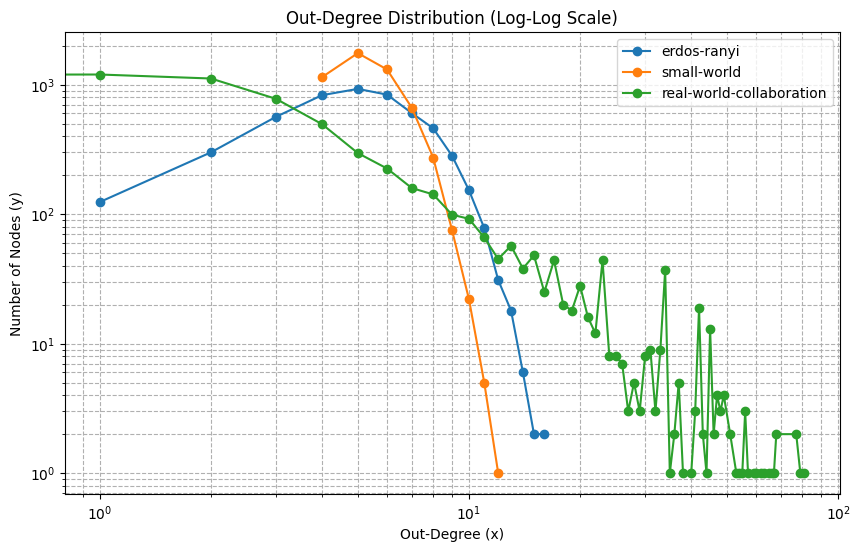

In [263]:
import matplotlib.pyplot as plt
import collections

plt.figure(figsize=(10, 6))
def plot_degree_distribution(G, label):
    degrees = [degree for node, degree in G.degree()]
    degree_counts = collections.Counter(degrees)

    # Sort the degree_counts by degree
    sorted_degree_counts = sorted(degree_counts.items())

    # Extract degrees and their counts
    degrees, counts = zip(*sorted_degree_counts)

    # Plot on a log-log scale
    plt.loglog(degrees, counts, marker='o', linestyle='-', label=label)

plot_degree_distribution(er_graph.graph, 'erdos-ranyi')
plot_degree_distribution(small_word_graph.graph, 'small-world')
plot_degree_distribution(rw_collaboration_graph, 'real-world-collaboration')

plt.title('Out-Degree Distribution (Log-Log Scale)')
plt.xlabel('Out-Degree (x)')
plt.ylabel('Number of Nodes (y)')
plt.legend()
plt.grid(True, which="both", ls="--")

In [283]:
def calculate_average_clustering_coefficient(G):

    average_clustering_coefficient = 0

    for node in G.nodes:
        neighbours = G.adj[node]
        neighbour_edges = set()

        if G.degree(node) < 2:
            continue

        neighbour_edges = set()
        for neighbour in neighbours:
            for neighbour_of_neighbour in G.adj[neighbour]:
                if neighbour_of_neighbour in neighbours and neighbour != node and neighbour_of_neighbour != neighbour:
                    a, b = neighbour, neighbour_of_neighbour
                    if a > b:
                        b,a = a,b
                    neighbour_edges.add((a,b))
        e = len(neighbour_edges)
        average_clustering_coefficient += 2 * e / (G.degree(node) * (G.degree(node) - 1))



    return average_clustering_coefficient / len(G.nodes) 

print(calculate_average_clustering_coefficient(er_graph.graph))
print(calculate_average_clustering_coefficient(small_word_graph.graph))
print(calculate_average_clustering_coefficient(rw_collaboration_graph))

0.0012807148543344852
0.28494166607481763
0.529635811052136


In [252]:
len(small_word_graph.graph.edges)

14484

In [253]:
len(rw_collaboration_graph.edges)

14484

In [ ]:
y